In [7]:
# Dependencies
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/anastasiakurakova/Desktop/ML/LocalRepository/BDA602/CC GENERAL.csv")

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Make sure that response is normally distributed:
response = data.loc[:,'BALANCE']
response

0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64

Text(0.5, 0, 'log of USD($)')

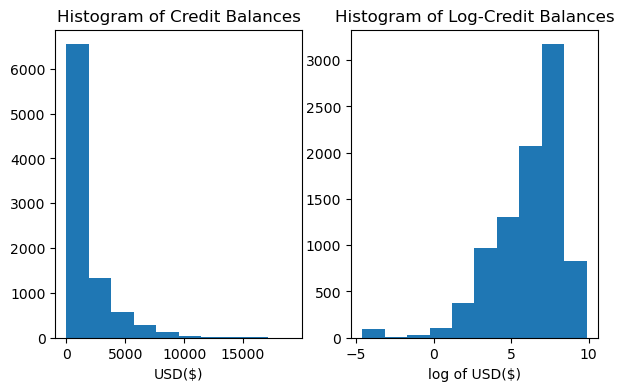

In [16]:
# Log-response that removes the unneccessary 0's and unskews the positive skew
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(7,4))
ax[0].hist(response)
ax[0].set_title("Histogram of Credit Balances")
ax[0].set_xlabel("USD($)")
ax[1].hist(log_response)
ax[1].set_title("Histogram of Log-Credit Balances")
ax[1].set_xlabel('log of USD($)')

In [9]:
np.min(data['BALANCE'])
np.max(data['BALANCE'])

19043.13856

In [19]:
# Prepare DataFrame
ols_reg1_df = pd.DataFrame(
    {"response": log_response,
     "purchases": data['PURCHASES']
     }
)

# Simple Linear Regression
ols_reg1 = smf.ols('response ~ purchases', data=ols_reg1_df)
ols_reg1

In [20]:
fit_reg1=ols_reg1.fit() #fit train response on predictor
fit_reg1.summary()
#p-value close to zero result is statistically significant!
#p-value<0.05  statistically significant
#p-value>=0.05 statistically insignificant
# r-squared tells how well the model fits the data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     249.9
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.54e-55
Time:                        20:54:51   Log-Likelihood:                -19788.
No. Observations:                8950   AIC:                         3.958e+04
Df Residuals:                    8948   BIC:                         3.959e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9216      0.026    229.649      0.000       5.871       5.972
purchases      0.0002   1.09e-05     15.808      0.000       0.000       0.000
==============================================================================
Omnibus:                     2722.315   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9383.077
Skew:                          -1.521   Prob(JB):                         0.00
Kurtosis:                       6.988   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Prepare DataFrame
ols_reg2_df = pd.DataFrame(
    {"response": log_response,
     "purchases": data['PURCHASES'], #main effect term
     "credit_limit": data['CREDIT_LIMIT'], # main effect term
     "interaction" : data['PURCHASES']* data['CREDIT_LIMIT'], #2-way interaction term -> makes regression model more flexible
     "credit_limit_squared": data["CREDIT_LIMIT"] **2, #Higher-order term
     }
)

# Simple Linear Regression
#OLS Regression assumes that terms are added to each other
ols_reg2 = smf.ols('response ~ purchases + credit_limit+ interaction + credit_limit_squared', data=ols_reg2_df)
ols_reg2
fit_reg2=ols_reg2.fit() #fit train response on predictor
fit_reg2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.29e-179
Time:                        21:09:25   Log-Likelihood:                -19490.
No. Observations:                8949   AIC:                         3.899e+04
Df Residuals:                    8944   BIC:                         3.903e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.0354      0.050    100.865      0.000       4.937       5.133
purchases                0.0002   2.41e-05      6.985      0.000       0.000       0.000
credit_limit             0.0003    1.8e-05     14.679      0.000       0.000       0.000
interaction          -6.451e-09   1.83e-09     -3.520      0.000      -1e-08   -2.86e-09
credit_limit_squared -7.425e-09   1.23e-09     -6.043      0.000   -9.83e-09   -5.02e-09
==============================================================================
Omnibus:                     3089.448   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11713.095
Skew:                          -1.704   Prob(JB):                         0.00
Kurtosis:                       7.449   Cond. No.                     1.51e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
log_response = np.log(data['BALANCE'].dropna()+ 0.01)

Text(0.5, 1.0, 'Histogram of Credit Balances')

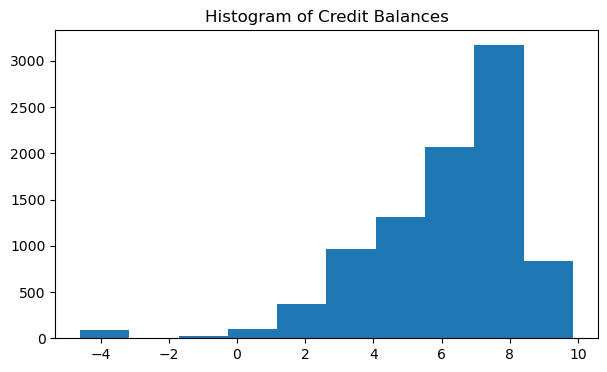

In [13]:
fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(7,4))
ax.hist(log_response)
ax.set_title("Histogram of Credit Balances")